# CSCI E-89 Deep Learning
## Lecture 02 Basic TensorFlow and Keras, Binary Classifier

## First steps with TensorFlow
These notbook contains materials from Francois Chollet's "Deep learning in Python" 2nd edition, Chapter 2 and 3

#### Constant tensors and Variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
import numpy as np
x = tf.ones(shape=(2, ))
print(x)

tf.Tensor([1. 1.], shape=(2,), dtype=float32)


In [2]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
y = [1.0, 1.0]
print(type(y))
print(y)

<class 'list'>
[1.0, 1.0]


In [4]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.10185274]
 [ 0.4523217 ]
 [-1.1474038 ]], shape=(3, 1), dtype=float32)


In [6]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.13729346]
 [0.46507168]
 [0.52181494]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [8]:
# Tensor constants are not
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.0
print(x)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

**Creating a Variable**

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.3716574 ],
       [-0.13463283],
       [ 0.01546779]], dtype=float32)>


**Assigning a value to a Variable**

In [10]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


**Assigning a value to a portion of a Variable**

In [11]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


**Using assign_add**

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [13]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [14]:
# Numpy Arrays behave as variables, not constants
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


#### Tensor operations: doing math in TensorFlow

**A few basic math operations**

In [15]:
a = tf.ones((2, 2))
print("a:\n", a)
b = tf.square(a)
print("b:\n", b)
c = tf.sqrt(a)
print("c:\n", c)
d = b + c
print("d:\n", d)
e = tf.matmul(a, b)
print("e:\n", e)
e *= d
print("e:\n", e)

a:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
b:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
d:
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e:
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e:
 tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


## A look at the `GradientTape` API

**Using the GradientTape**

In [16]:
in_var = tf.Variable(initial_value=3.)
print("in_var = ", in_var.numpy())  # .numpy() prints only the value
with tf.GradientTape() as tape:
   result = tf.square(in_var)
gradient = tape.gradient(result, in_var)

in_var =  3.0


In [17]:
print("d(in_var**2)/d(in_var) = ", gradient.numpy())

d(in_var**2)/d(in_var) =  6.0


**Using the GradientTape with constant tensor inputs**

In [18]:
in_const = tf.constant(4.)
print("in_const = ", in_const.numpy())  # .numpy() prints only the value

with tf.GradientTape() as tape:
   tape.watch(in_const)    # constants are normally not tracked. This one is watched, however.
   result = tf.square(in_const)
    
gradient = tape.gradient(result, in_const)

in_const =  4.0


In [19]:
print("d(in_const**2)/d(in_const) = ", gradient.numpy())

d(in_const**2)/d(in_const) =  8.0


**Using nested gradient tapes to compute second-order gradients**

In [20]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.905 * time ** 2  # 0.5gt^2 (g = 9.81 m/sec^2)
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [21]:
acceleration.numpy()

9.81

## A linear classifier in TensorFlow

**Generating two classes of random points in a 2D plane**

In [22]:
import tensorflow as tf
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [23]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [24]:
inputs.shape

(2000, 2)

**Generating the corresponding targets (0 and 1)**

In [25]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [26]:
targets.shape

(2000, 1)

**Plotting the two point classes**

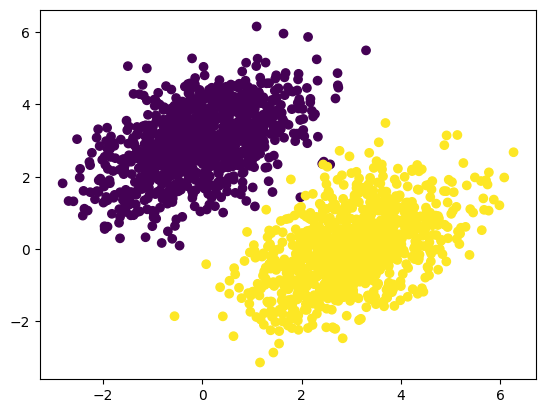

In [27]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [28]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [29]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [30]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [31]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [32]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.2085
Loss at step 1: 0.2351
Loss at step 2: 0.1244
Loss at step 3: 0.1061
Loss at step 4: 0.0981
Loss at step 5: 0.0918
Loss at step 6: 0.0861
Loss at step 7: 0.0809
Loss at step 8: 0.0761
Loss at step 9: 0.0718
Loss at step 10: 0.0678
Loss at step 11: 0.0642
Loss at step 12: 0.0609
Loss at step 13: 0.0578
Loss at step 14: 0.0550
Loss at step 15: 0.0525
Loss at step 16: 0.0502
Loss at step 17: 0.0481
Loss at step 18: 0.0461
Loss at step 19: 0.0444
Loss at step 20: 0.0427
Loss at step 21: 0.0412
Loss at step 22: 0.0399
Loss at step 23: 0.0387
Loss at step 24: 0.0375
Loss at step 25: 0.0365
Loss at step 26: 0.0355
Loss at step 27: 0.0347
Loss at step 28: 0.0339
Loss at step 29: 0.0332
Loss at step 30: 0.0325
Loss at step 31: 0.0319
Loss at step 32: 0.0313
Loss at step 33: 0.0308
Loss at step 34: 0.0304
Loss at step 35: 0.0299
Loss at step 36: 0.0296
Loss at step 37: 0.0292
Loss at step 38: 0.0289
Loss at step 39: 0.0286


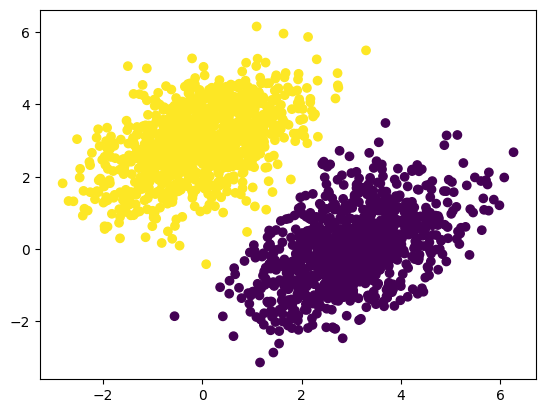

In [33]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] < 0.5)
plt.show()

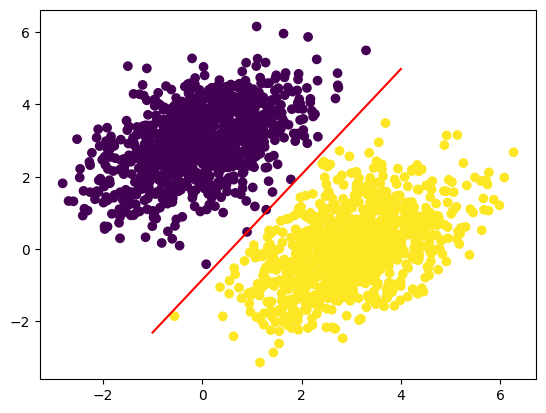

In [34]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: understanding core Keras APIs

### Layers: the building blocks of deep learning

#### The base `Layer` class in Keras

In [35]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [36]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: building layers on the fly

In [37]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [38]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [39]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: configuring the learning process
We add a loss function, here `mean-squared_error`, and an optimizer, here `rmsprop`.

In [40]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [41]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Understanding the `fit` method

**Calling `fit` with NumPy data**

In [42]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 680us/step - loss: 5.1881 - binary_accuracy: 0.4605
Epoch 2/5
16/16 [==============================] - 0s 656us/step - loss: 4.8692 - binary_accuracy: 0.4585
Epoch 3/5
16/16 [==============================] - 0s 590us/step - loss: 4.6058 - binary_accuracy: 0.4570
Epoch 4/5
16/16 [==============================] - 0s 751us/step - loss: 4.3592 - binary_accuracy: 0.4530
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 4.1199 - binary_accuracy: 0.4500


In [43]:
history.history

{'loss': [5.188117027282715,
  4.869211196899414,
  4.605831623077393,
  4.359227180480957,
  4.119909286499023],
 'binary_accuracy': [0.46050000190734863,
  0.4584999978542328,
  0.4569999873638153,
  0.453000009059906,
  0.44999998807907104]}

### Monitoring loss & metrics on validation data

**Using the validation data argument**

In [44]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.3120 - binary_accuracy: 0.8814 - val_loss: 0.0479 - val_binary_accuracy: 0.9833
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0732 - binary_accuracy: 0.9600 - val_loss: 0.0688 - val_binary_accuracy: 0.9533
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0699 - binary_accuracy: 0.9600 - val_loss: 0.0311 - val_binary_accuracy: 0.9967
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0776 - binary_accuracy: 0.9507 - val_loss: 0.0302 - val_binary_accuracy: 0.9933
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0640 - binary_accuracy: 0.9686 - val_loss: 0.2602 - val_binary_accuracy: 0.5650


### Inference: using a model after training

In [45]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 755us/step
[[0.93522274]
 [0.6046696 ]
 [0.58992904]
 [0.8745742 ]
 [0.80555534]
 [0.76715773]
 [0.7684952 ]
 [1.0659683 ]
 [0.5941535 ]
 [0.86597633]]
